In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import enchant
from enchant.checker import SpellChecker # Spell checking package

In [2]:
help(enchant)

Help on package enchant:

NAME
    enchant

DESCRIPTION
    enchant:  Access to the enchant spellchecking library
    
    This module provides several classes for performing spell checking
    via the Enchant spellchecking library.  For more details on Enchant,
    visit the project website:
    
        https://abiword.github.io/enchant/
    
    Spellchecking is performed using 'Dict' objects, which represent
    a language dictionary.  Their use is best demonstrated by a quick
    example::
    
        >>> import enchant
        >>> d = enchant.Dict("en_US")   # create dictionary for US English
        >>> d.check("enchant")
        True
        >>> d.check("enchnt")
        False
        >>> d.suggest("enchnt")
        ['enchant', 'enchants', 'enchanter', 'penchant', 'incant', 'enchain', 'enchanted']
    
    Languages are identified by standard string tags such as "en" (English)
    and "fr" (French).  Specific language dialects can be specified by
    including an additional co

### Here I will do some exploratory data analysis (EDA) on the training data.

In [3]:
df = pd.read_csv('train.csv')
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
# What are the data types? Any null values?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [5]:
# Some elementary statistics
df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df_numeric = df.loc[:, 'cohesion':]

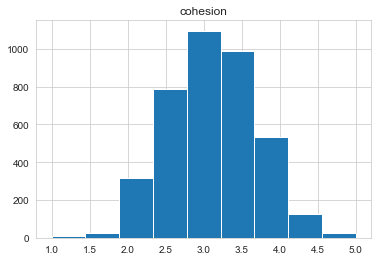

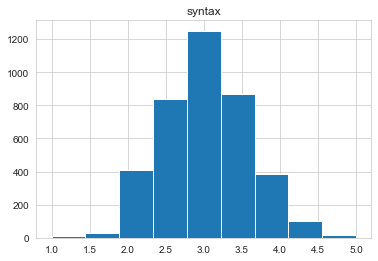

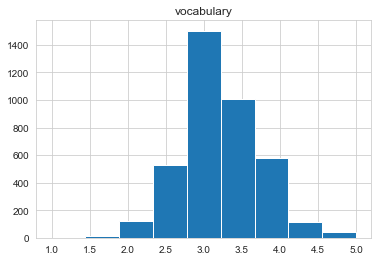

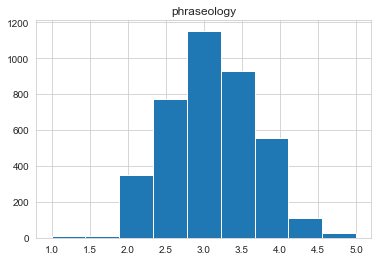

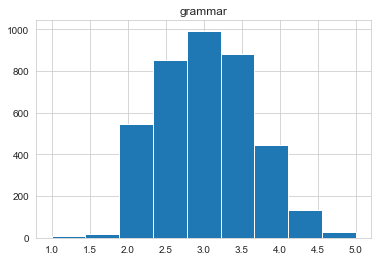

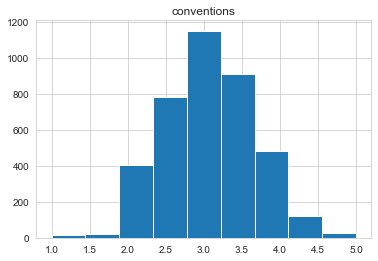

In [7]:
# Histograms
for col in df_numeric:
    df.hist(column=col, bins=9)

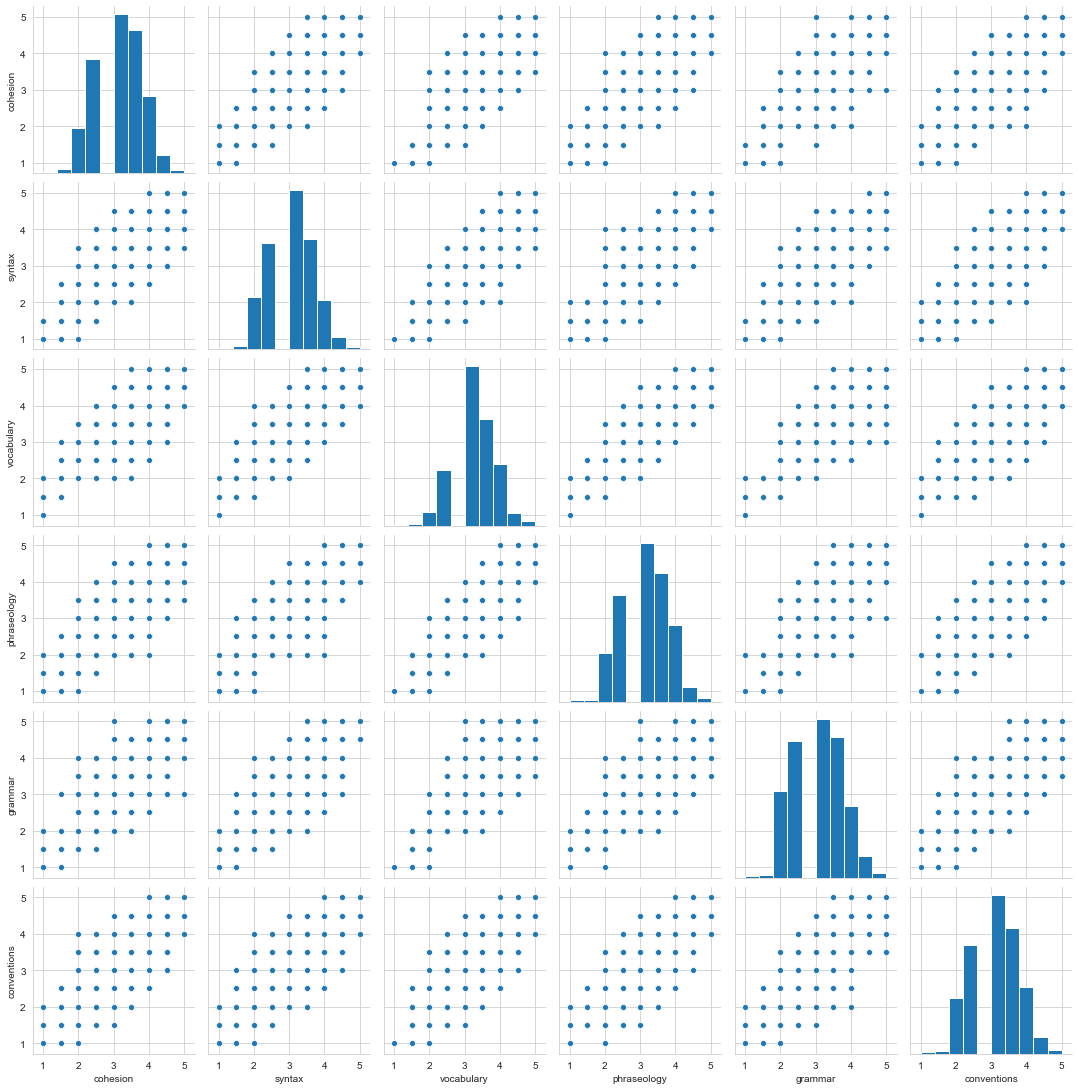

In [8]:
# Check correlations, create pairplot
df_numeric.corr()
sns.pairplot(df_numeric)

In [9]:
# Add the total score
df["Score"] = sum([df[col] for col in df_numeric.columns])
df[df["Score"]>=27]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,Score
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0
24,01B3FDB3FD57,"Scientist Albert Einstein once said, ""Imaginat...",4.0,4.5,5.0,4.0,5.0,4.5,27.0
104,07CE77EA56C5,Students work hard there is no arguing that. T...,5.0,5.0,5.0,5.0,4.5,4.5,29.0
143,0AFC8CE27321,"By the time students enter high school, I beli...",4.5,5.0,4.5,5.0,5.0,4.5,28.5
183,0E03218FDD2F,Educators say that students should have shorte...,4.0,4.5,4.0,5.0,5.0,5.0,27.5
258,12E3D52345C6,Technology has always acted as a compelling an...,5.0,5.0,5.0,5.0,4.5,5.0,29.5
261,12FE853D6B88,I agree with Emerson's statement because peopl...,4.5,4.0,5.0,5.0,4.5,4.0,27.0
339,196096A1C048,I would like to become a Cardiologist in my fu...,4.5,4.5,4.5,4.5,4.5,4.5,27.0
385,1D327ADD95AA,Whether the limitation of human contact due to...,4.5,4.0,5.0,4.5,4.5,4.5,27.0
411,1F4961D46D29,Imagination Over Mind\n\nImagination it's what...,4.5,4.0,5.0,4.5,4.5,4.5,27.0


### I expect spelling mistakes to greatly affect the students' scores.

In [10]:
# Spell checker: count misspelled words in essay

misspell_count = []

for text in df['full_text']:
    chkr = SpellChecker('en_US')
    chkr.set_text(text)
    counterror = 0
    for err in chkr:
        counterror += 1
    misspell_count.append(counterror)

word_count = [len(df['full_text'][i].split()) for i in range(len(df.index))] # Word count in essay
percent_misspell = [100 * misspell_count[i] / word_count[i] for i in range(len(df.index))] # Percent misspelled words in essay

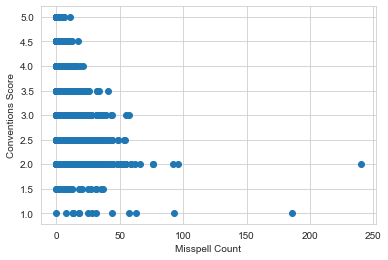

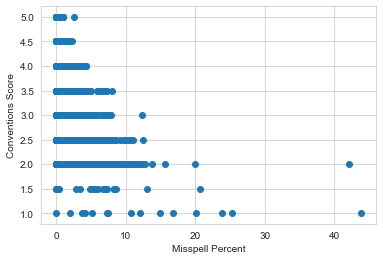

In [11]:
# Outliers: [375, 3086]
plt.scatter(misspell_count, df['conventions'])
plt.xlabel('Misspell Count')
plt.ylabel('Conventions Score')
plt.show()
plt.scatter(percent_misspell, df['conventions'])
plt.xlabel('Misspell Percent')
plt.ylabel('Conventions Score')
plt.show()

### I see two outliers with very large number of spelling mistakes. Let's check out their indices.

In [12]:
[misspell_count.index(elem) for elem in misspell_count if elem>150]

[375, 3086]

### Let's check out the `full_text`.

In [13]:
print(df.iloc[375].full_text, '\n\n#########################################################\n\n')
print(df.iloc[3086].full_text)

I`m agree whit the individuality. I like when the people take whatever they wants for yours life is so cool. I have too much friend and they do the think another peoples do. I mean i like do what i`m said and what i like i don`t now.

My family is so negative when they said sometime and i don`t like because i want said sometime but they no want lisent. so i`m individuality because i want lisent to me and do the think i want.

I know to much people dependt of other and that`s no good.

The history class said too much about that because in the past the people are not indiviuality.

I think the people want more attention that why depent of other people.

The life now is to diferent of after because now the people yos depent the what said other person about who i`m look or what he said about me an all theese think.

I like who i am cause i`m a nice and all good thinks so i do whathever i wnat because i ike who is the people and i dont care what they said about me.

Yo ya nose que escribir 

### Looks like both have a big fraction written in Spanish, which obviously makes them outliers. I think these should be removed from the training data.

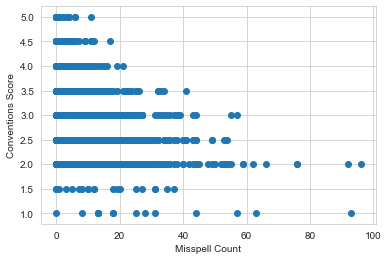

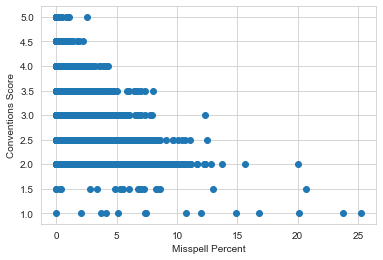

conventions_absolute_error:
[[ 1.         -0.40842002]
 [-0.40842002  1.        ]] 


conventions_relative_error:
[[ 1.         -0.47928218]
 [-0.47928218  1.        ]]


In [14]:
df_clean = df.drop(index=[375, 3086])

# removing outliers from misspell_count and percent_misspell lists
mc_clean = [x for i, x in enumerate(misspell_count) if i!=375 and i!=3086]
mcp_clean = [x for i, x in enumerate(percent_misspell) if i!=375 and i!=3086]

# Scatter plots without outliers
plt.scatter(mc_clean, df_clean['conventions'])
plt.xlabel('Misspell Count')
plt.ylabel('Conventions Score')
plt.show()

plt.scatter(mcp_clean, df_clean['conventions'])
plt.xlabel('Misspell Percent')
plt.ylabel('Conventions Score')
plt.show()

# Correlations without outliers
print('conventions_absolute_error:')
print(np.corrcoef(mc_clean, df_clean['conventions']), '\n\n')

print('conventions_relative_error:')
print(np.corrcoef(mcp_clean, df_clean['conventions']))


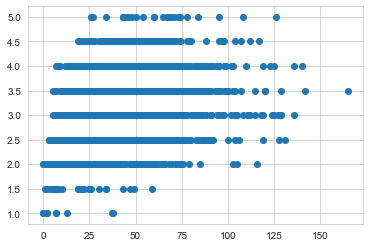

cohesion :
[[1.         0.30730952]
 [0.30730952 1.        ]]


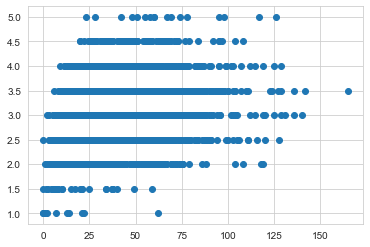

syntax :
[[1.         0.27432632]
 [0.27432632 1.        ]]


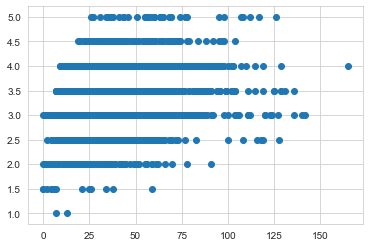

vocabulary :
[[1.         0.32294692]
 [0.32294692 1.        ]]


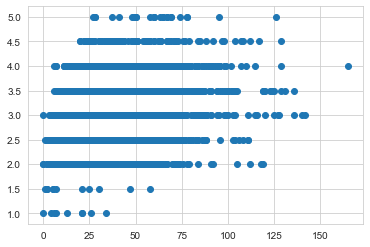

phraseology :
[[1.         0.25874434]
 [0.25874434 1.        ]]


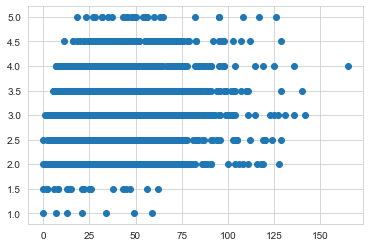

grammar :
[[1.         0.15037631]
 [0.15037631 1.        ]]


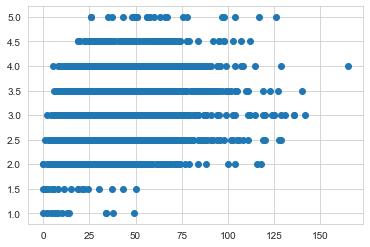

conventions :
[[1.         0.25991012]
 [0.25991012 1.        ]]


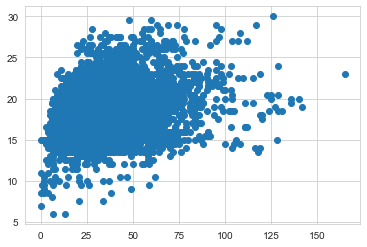

Score :
[[1.         0.30266749]
 [0.30266749 1.        ]]


In [15]:
puncts = ['.', ',', ';', ':', '\'', '!', '?']

punct_count = []

for text in df_clean['full_text']:
    punct_count.append(sum([text.count(punct) for punct in puncts]))

for col in df_clean.columns[2:]:
    plt.scatter(punct_count, df_clean[col])
    plt.show()
    print(col, ':')
    print(np.corrcoef(punct_count, df_clean[col]))

### There seems to be some (not strong) correlation between the count of punctuations and the scores. It's surprising that the highest correlation is with `vocabulary`, (=0.32) but sensible that it correlates with `cohesion` (0.3).

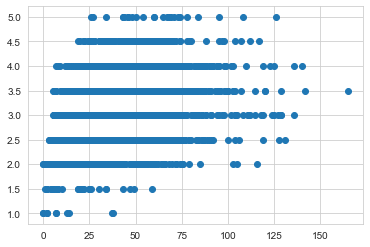

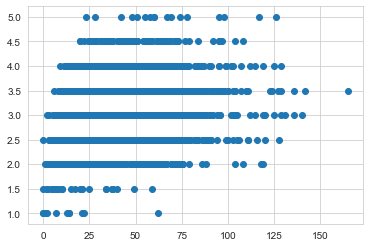

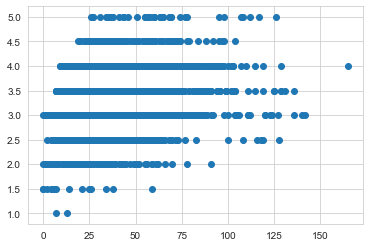

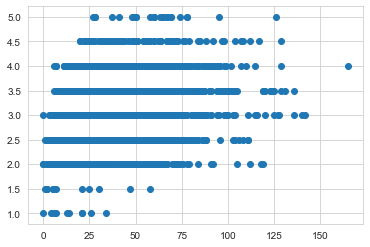

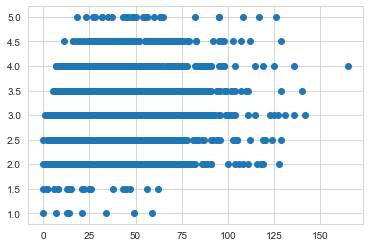

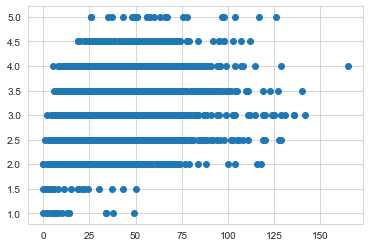

cohesion :

[[1.         0.30791116]
 [0.30791116 1.        ]]
syntax :

[[1.         0.27496516]
 [0.27496516 1.        ]]
vocabulary :

[[1.         0.32353544]
 [0.32353544 1.        ]]
phraseology :

[[1.         0.25948512]
 [0.25948512 1.        ]]
grammar :

[[1.         0.15115913]
 [0.15115913 1.        ]]
conventions :

[[1.         0.26063258]
 [0.26063258 1.        ]]


In [16]:
punct_count = [sum([text.count(punct) for punct in puncts]) for text in df['full_text']]

attrs = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
for attr in attrs:
    plt.scatter(punct_count, df[attr])
    plt.show()

for attr in attrs:
    print(attr, ':\n')
    print(np.corrcoef(punct_count, df[attr]))

In [17]:
df.sample(n=5)['full_text']

3218    Can failure lead to success?\n\nFormer British...
3079    Should Generic_School extended school day's by...
1399    THE SUCCESS OF LIFE\n\nthe success of hes life...
924     Did you know that some teachers/educators want...
2194    Working idenpendently is harder than working a...
Name: full_text, dtype: object

### Average sentence length / number of words per sentence? I expect longer sentences to be scored lower. Also indicates lack of punctuation.

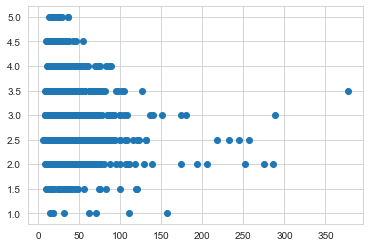

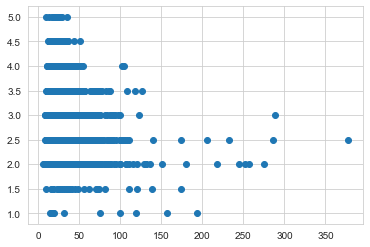

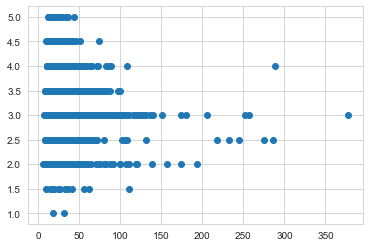

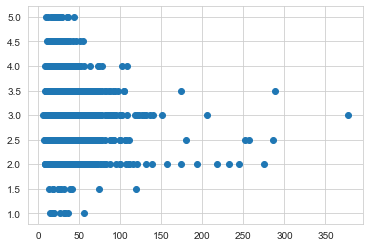

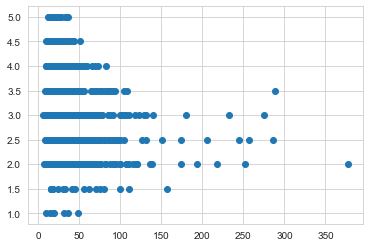

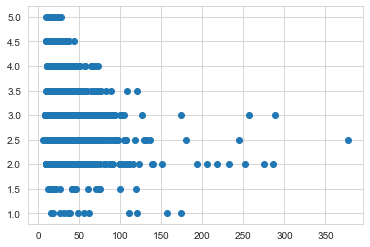

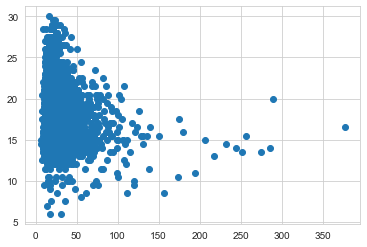

cohesion :
[[ 1.         -0.18931028]
 [-0.18931028  1.        ]]
syntax :
[[ 1.         -0.25666611]
 [-0.25666611  1.        ]]
vocabulary :
[[ 1.         -0.15441749]
 [-0.15441749  1.        ]]
phraseology :
[[ 1.        -0.1514217]
 [-0.1514217  1.       ]]
grammar :
[[ 1.         -0.18233224]
 [-0.18233224  1.        ]]
conventions :
[[ 1.         -0.23853555]
 [-0.23853555  1.        ]]
Score :
[[ 1.         -0.22828961]
 [-0.22828961  1.        ]]


In [18]:
words_per_sent = [word_count[i] / len(df['full_text'][i].split('.')) for i in range(len(df.index))]
del words_per_sent[375]
del words_per_sent[3086]

for col in df_clean.columns[2:]:
    plt.scatter(words_per_sent, df_clean[col])
    plt.show()
    
for col in df_clean.columns[2:]:
    print(col, ':')
    print(np.corrcoef(words_per_sent, df_clean[col]))

### As expected, there is a negative correlation between average sentence length and the scores. The correlations are not very high in magnitude. Max is `syntax` score with correlation = -0.25.

### How about capital letters?

In [19]:
import string

string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

cohesion


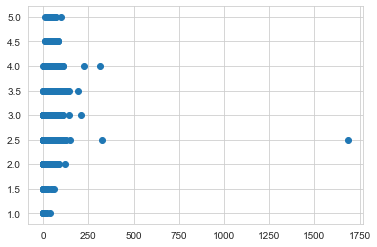

[[1.         0.12092835]
 [0.12092835 1.        ]]
syntax


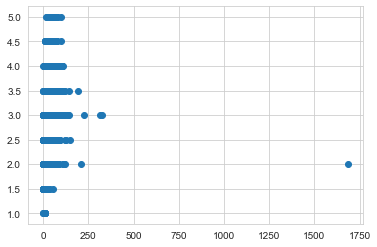

[[1.         0.10991653]
 [0.10991653 1.        ]]
vocabulary


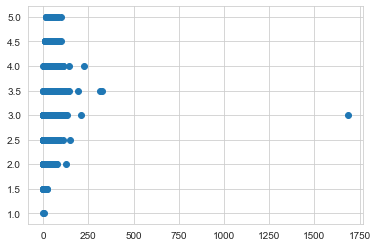

[[1.         0.14777848]
 [0.14777848 1.        ]]
phraseology


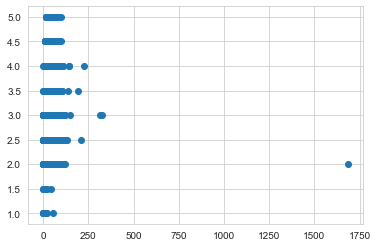

[[1.         0.09574045]
 [0.09574045 1.        ]]
grammar


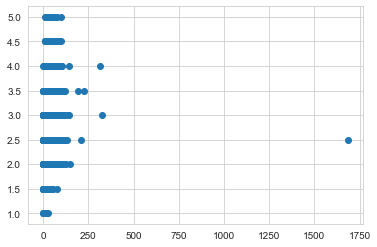

[[1.         0.07874637]
 [0.07874637 1.        ]]
conventions


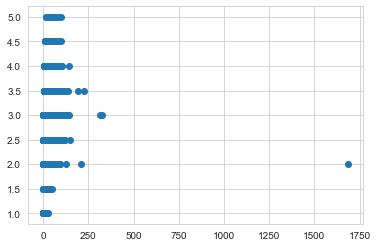

[[1.         0.10172813]
 [0.10172813 1.        ]]
Score


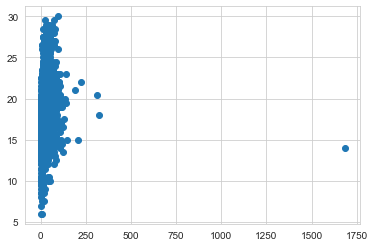

[[1.        0.1258453]
 [0.1258453 1.       ]]


In [20]:
capital_count = [sum(1 for c in df['full_text'][i] if c.isupper()) for i in range(len(df.index))]
del capital_count[375]
del capital_count[3086]

for col in df.columns[2:]:
    print(col)
    plt.scatter(capital_count, df_clean[col])
    plt.show()
    print(np.corrcoef(capital_count, df_clean[col]))

### Nope!

cohesion


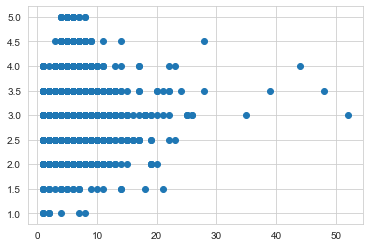

[[1.         0.03304907]
 [0.03304907 1.        ]]
syntax


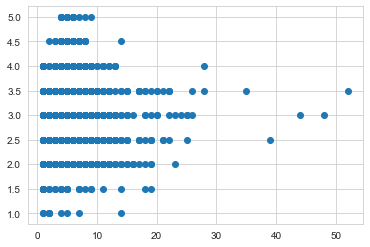

[[ 1.        -0.0121907]
 [-0.0121907  1.       ]]
vocabulary


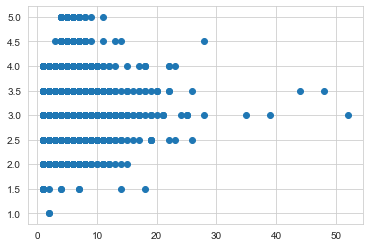

[[1.         0.01313015]
 [0.01313015 1.        ]]
phraseology


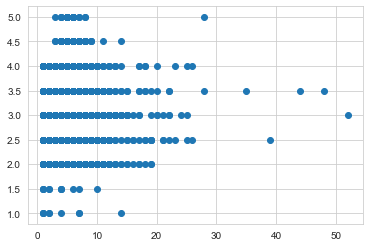

[[1.00000000e+00 8.88167451e-04]
 [8.88167451e-04 1.00000000e+00]]
grammar


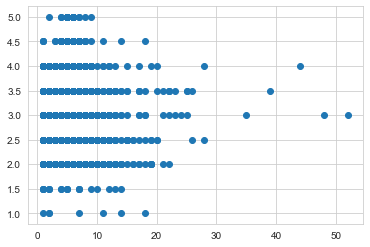

[[ 1.         -0.05405923]
 [-0.05405923  1.        ]]
conventions


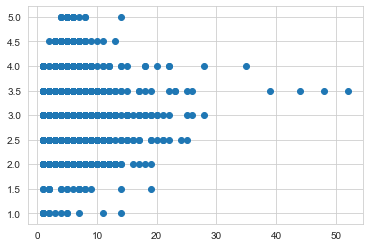

[[1.         0.00711168]
 [0.00711168 1.        ]]
Score


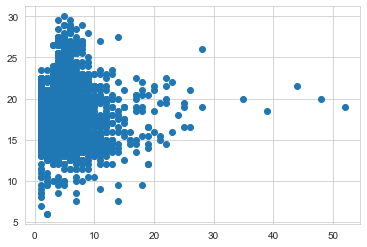

[[ 1.         -0.00320707]
 [-0.00320707  1.        ]]


In [21]:
capital_count = [len(df['full_text'][i].split('\n\n')) for i in range(len(df.index))]
del capital_count[375]
del capital_count[3086]

for col in df.columns[2:]:
    print(col)
    plt.scatter(capital_count, df_clean[col])
    plt.show()
    print(np.corrcoef(capital_count, df_clean[col]))